In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing.ftr')
df

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [3]:
df['speed_id'].value_counts(dropna=False)

20M     1451047
10M      632952
30M      208701
50M      161005
40M       65495
100M      43961
1M        31105
3M        12638
2M        11764
200M       4624
5M         3643
512K       3311
300M       1374
256K        881
Name: speed_id, dtype: int64

<10, 10, 20, 30, 40-50, >=100

In [4]:
mask_speed_less10 = (df['speed_id'] == '256K') | (df['speed_id'] == '512K') | (df['speed_id'] == '1M') | (df['speed_id'] == '2M') | (df['speed_id'] == '3M') | (df['speed_id'] == '5M')
mask_speed_10 = df['speed_id'] == '10M'
mask_speed_20 = df['speed_id'] == '20M'
mask_speed_30 = df['speed_id'] == '30M'
mask_speed_40n50 = (df['speed_id'] == '40M') | (df['speed_id'] == '50M')
mask_speed_100nmore = (df['speed_id'] == '100M') | (df['speed_id'] == '200M') | (df['speed_id'] == '300M')

In [5]:
df['speed_id_v2'] = df['speed_id']

In [6]:
df['speed_id_v2'] = df['speed_id_v2'].mask(mask_speed_less10, '<10M')
df['speed_id_v2'] = df['speed_id_v2'].mask(mask_speed_10, '10M')
df['speed_id_v2'] = df['speed_id_v2'].mask(mask_speed_20, '20M')
df['speed_id_v2'] = df['speed_id_v2'].mask(mask_speed_30, '30M')
df['speed_id_v2'] = df['speed_id_v2'].mask(mask_speed_40n50, '40-50M')
df['speed_id_v2'] = df['speed_id_v2'].mask(mask_speed_100nmore, '>=100M')

In [7]:
df

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2,speed_id_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total,<10M
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi,10M
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total,10M
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat,20M
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat,20M
...,...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total,20M
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat,10M
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total,20M
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat,30M


In [8]:
df['speed_id_v2'].value_counts()

20M       1451047
10M        632952
40-50M     226500
30M        208701
<10M        63342
>=100M      49959
Name: speed_id_v2, dtype: int64

In [9]:
# df.to_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing-v2.ftr')

In [10]:
def make_df_reg(reg):
    ramah_dict = {}
    marah_dict = {}

    speed_lst = ['<10M', '10M', '20M', '30M', '40-50M', '>=100M']
    for speed in speed_lst:
        ramah_perc = round(df['emosi'][(df['speed_id_v2'] == speed) & (df['reg'] == reg)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
        if ramah_perc not in ramah_dict:
            ramah_dict[speed] = ramah_perc

        marah_perc = round(df['emosi'][(df['speed_id_v2'] == speed) & (df['reg'] == reg)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
        if marah_perc not in marah_dict:
            marah_dict[speed] = marah_perc
            
    
    plot = pd.DataFrame(list(marah_dict.items()), columns = ['speed_id', 'marah_perc'])
    plot = plot.sort_values(by='marah_perc', ascending=True)
    plot['reg'] = reg
    
    return plot

In [11]:
start_time = time.time()

plot1 = make_df_reg(reg=1)
plot1 = plot1.sort_index()

plot2 = make_df_reg(reg=2)
plot2 = plot2.sort_index()

plot3 = make_df_reg(reg=3)
plot3 = plot3.sort_index()

plot4 = make_df_reg(reg=4)
plot4 = plot4.sort_index()

plot5 = make_df_reg(reg=5)
plot5 = plot5.sort_index()

plot6 = make_df_reg(reg=6)
plot6 = plot6.sort_index()

plot7 = make_df_reg(reg=7)
plot7 = plot7.sort_index()

df_conc = pd.concat([plot1, plot2, plot3, plot4, plot5, plot6, plot7])

print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 46.254323959350586


In [12]:
df_conc = df_conc.reset_index(drop=True)

In [13]:
df_conc

,speed_id,marah_perc,reg
0,<10M,31.32,1
1,10M,33.14,1
2,20M,32.94,1
3,30M,30.95,1
4,40-50M,31.38,1
5,>=100M,29.66,1
6,<10M,36.81,2
7,10M,37.85,2
8,20M,38.13,2
9,30M,36.14,2


In [14]:
ramah_dict = {}
marah_dict = {}

speed_lst = ['<10M', '10M', '20M', '30M', '40-50M', '>=100M']
for speed in speed_lst:
    ramah_perc = round(df['emosi'][df['speed_id_v2'] == speed].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    if ramah_perc not in ramah_dict:
        ramah_dict[speed] = ramah_perc
        
    marah_perc = round(df['emosi'][df['speed_id_v2'] == speed].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    if marah_perc not in marah_dict:
        marah_dict[speed] = marah_perc

In [15]:
plot_all = pd.DataFrame(list(marah_dict.items()), columns = ['speed_id', 'marah_perc'])
plot_all = plot_all.sort_values(by='marah_perc', ascending=True)

In [16]:
plot_all = plot_all.sort_index()

In [17]:
plot_all

,speed_id,marah_perc
0,<10M,35.69
1,10M,35.60
2,20M,35.32
3,30M,33.87
4,40-50M,33.47
5,>=100M,30.27


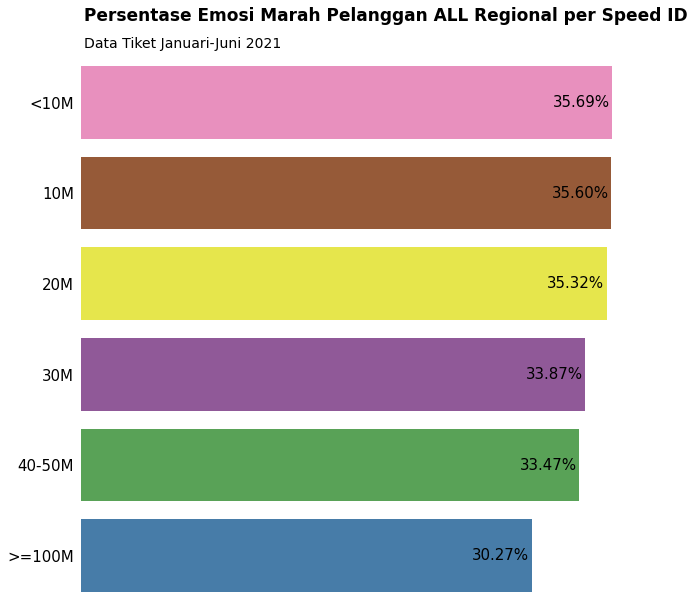

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.barplot(ax=ax, data=plot_all.sort_values('marah_perc', ascending=False),
            x='marah_perc', y='speed_id',
            orient='h', palette='Set1_r')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['<10M', '10M', '20M', '30M', '40-50M', '>=100M'],
                   fontsize=15)
ax.set_xticks([])
# ax.text(x=19.3, y=-0.6, s='20%', alpha=0.5)
# ax.text(x=39.3, y=-0.6, s='40%', alpha=0.5)
# ax.text(x=49.5, y=-0.6, s='50%', alpha=0.5)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)
    
# ax.axvline(x=20, color='grey', alpha=0.15)
# ax.axvline(x=40, color='grey', alpha=0.15)
# ax.axvline(x=50, color='grey', alpha=0.15)

ax.text(x=0.2, y=-0.9, s='Persentase Emosi Marah Pelanggan ALL Regional per Speed ID', weight='bold', size=17)
ax.text(x=0.2, y=-0.6, s='Data Tiket Januari-Juni 2021', size=14)

# Annotate
ax.text(x=31.69, y=0.05, s='35.69%', size=15)
ax.text(x=31.60, y=1.05, s='35.60%', size=15)
ax.text(x=31.32, y=2.05, s='35.32%', size=15)
ax.text(x=29.87, y=3.05, s='33.87%', size=15)
ax.text(x=29.47, y=4.05, s='33.47%', size=15)
ax.text(x=26.27, y=5.05, s='30.27%', size=15)

plt.show();

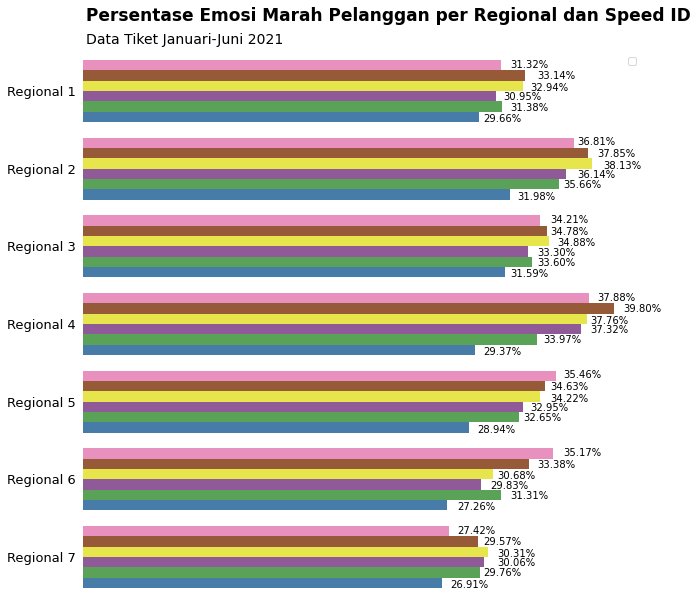

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.barplot(ax=ax, data=df_conc,
            x='marah_perc', y='reg', hue='speed_id',
            orient='h', palette='Set1_r')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['Regional 1', 'Regional 2', 'Regional 3', 'Regional 4', 'Regional 5', 'Regional 6', 'Regional 7'],
                   fontsize=13)
ax.set_xticks([])
# ax.text(x=19.3, y=-0.65, s='20%', alpha=0.5)
# ax.text(x=39.3, y=-0.65, s='40%', alpha=0.5)
# ax.text(x=44.3, y=-0.65, s='45%', alpha=0.5)

ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

# ax.legend(frameon=False, bbox_to_anchor=(1.25, 0.6))
ax.legend([])
# ax.axvline(x=20, color='grey', alpha=0.15)
# ax.axvline(x=40, color='grey', alpha=0.15)
# ax.axvline(x=45, color='grey', alpha=0.15)

ax.text(x=0.2, y=-0.9, s='Persentase Emosi Marah Pelanggan per Regional dan Speed ID', weight='bold', size=17)
ax.text(x=0.2, y=-0.6, s='Data Tiket Januari-Juni 2021', size=14)

# Annotate <10M
ax.text(x=32, y=-0.3, s='31.32%')
ax.text(x=37, y=0.7, s='36.81%')
ax.text(x=35, y=1.7, s='34.21%')
ax.text(x=38.5, y=2.7, s='37.88%')
ax.text(x=36, y=3.7, s='35.46%')
ax.text(x=36, y=4.7, s='35.17%')
ax.text(x=28, y=5.7, s='27.42%')

# Annotate 10M
ax.text(x=34, y=-0.15, s='33.14%')
ax.text(x=38.5, y=0.85, s='37.85%')
ax.text(x=35, y=1.85, s='34.78%')
ax.text(x=40.5, y=2.85, s='39.80%')
ax.text(x=35, y=3.85, s='34.63%')
ax.text(x=34, y=4.85, s='33.38%')
ax.text(x=30, y=5.85, s='29.57%')

# Annotate 20M
ax.text(x=33.5, y=0, s='32.94%')
ax.text(x=39, y=1, s='38.13%')
ax.text(x=35.5, y=2, s='34.88%')
ax.text(x=38, y=3, s='37.76%')
ax.text(x=35, y=4, s='34.22%')
ax.text(x=31, y=5, s='30.68%')
ax.text(x=31, y=6, s='30.31%')

# Annotate 30M
ax.text(x=31.5, y=0.12, s='30.95%')
ax.text(x=37, y=1.12, s='36.14%')
ax.text(x=34, y=2.12, s='33.30%')
ax.text(x=38, y=3.12, s='37.32%')
ax.text(x=33.5, y=4.12, s='32.95%')
ax.text(x=30.5, y=5.12, s='29.83%')
ax.text(x=31, y=6.12, s='30.06%')

# Annotate 40-50M
ax.text(x=32, y=0.25, s='31.38%')
ax.text(x=36, y=1.25, s='35.66%')
ax.text(x=34, y=2.25, s='33.60%')
ax.text(x=34.5, y=3.25, s='33.97%')
ax.text(x=33, y=4.25, s='32.65%')
ax.text(x=32, y=5.25, s='31.31%')
ax.text(x=30, y=6.25, s='29.76%')

# Annotate >=100M
ax.text(x=30, y=0.4, s='29.66%')
ax.text(x=32.5, y=1.4, s='31.98%')
ax.text(x=32, y=2.4, s='31.59%')
ax.text(x=30, y=3.4, s='29.37%')
ax.text(x=29.5, y=4.4, s='28.94%')
ax.text(x=28, y=5.4, s='27.26%')
ax.text(x=27.5, y=6.4, s='26.91%')

plt.show();

# -----
## Checkpoint
# -----

In [20]:
df

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2,speed_id_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total,<10M
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi,10M
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total,10M
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat,20M
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat,20M
...,...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total,20M
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat,10M
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total,20M
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat,30M


In [21]:
df['speed_id_v2'].value_counts(normalize=True).sort_index()*100

10M       24.043752
20M       55.120473
30M        7.927860
40-50M     8.603985
<10M       2.406153
>=100M     1.897777
Name: speed_id_v2, dtype: float64

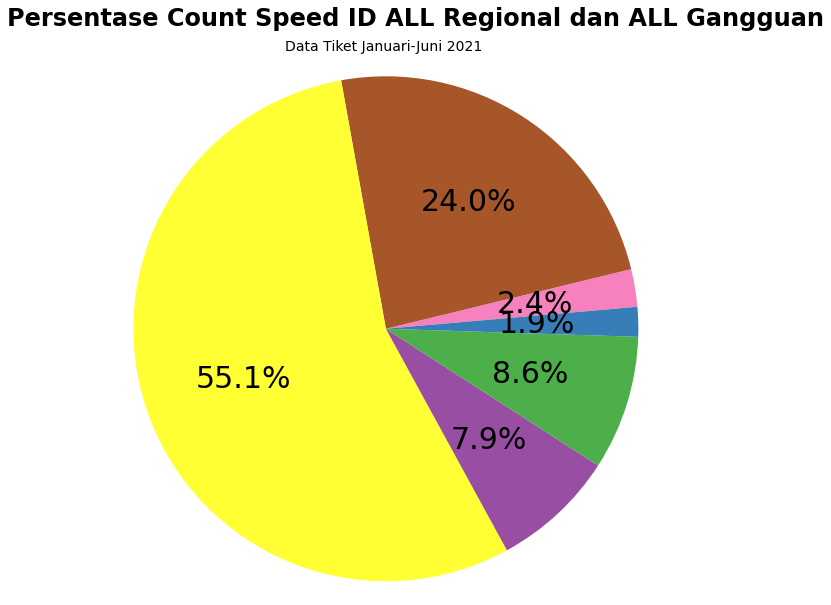

In [22]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [2.406153, 24.043752, 55.120473, 7.927860, 8.603985, 1.897777]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 30})
ax.axis('equal')

ax.text(x=-1.5, y=1.2, s='Persentase Count Speed ID ALL Regional dan ALL Gangguan', weight='bold', size=24)
ax.text(x=-0.4, y=1.1, s='Data Tiket Januari-Juni 2021', size=14)

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [23]:
df['speed_id_v2'][df['reg'] == 1].value_counts(normalize=True).sort_index()*100

10M       23.334130
20M       55.443332
30M        7.783541
40-50M     9.153828
<10M       1.920791
>=100M     2.364379
Name: speed_id_v2, dtype: float64

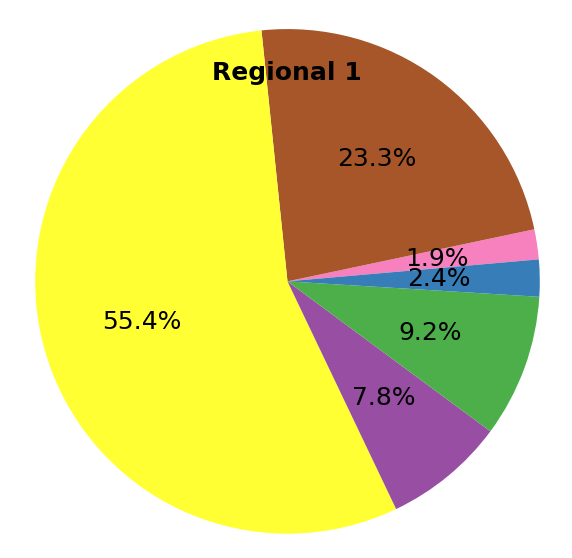

In [24]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [1.920791, 23.334130, 55.443332, 7.783541, 9.153828, 2.364379]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 1', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [25]:
df['speed_id_v2'][df['reg'] == 2].value_counts(normalize=True).sort_index()*100

10M       20.528319
20M       56.414289
30M        8.769033
40-50M     8.912930
<10M       3.321446
>=100M     2.053982
Name: speed_id_v2, dtype: float64

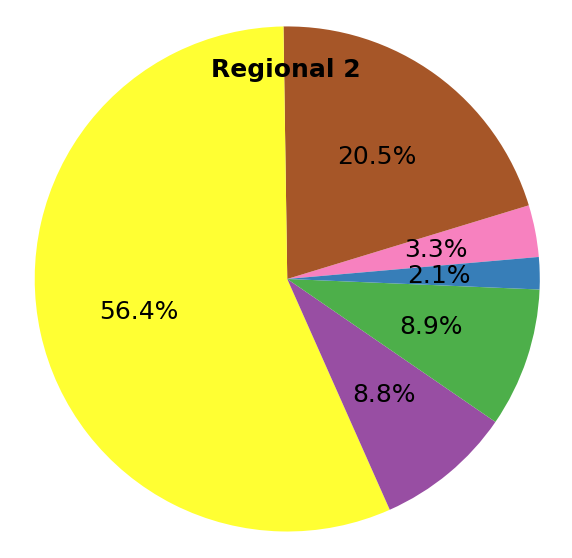

In [26]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [3.321446, 20.528319, 56.414289, 8.769033, 8.912930, 2.053982]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 2', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [27]:
df['speed_id_v2'][df['reg'] == 3].value_counts(normalize=True).sort_index()*100

10M       23.890955
20M       56.485220
30M        7.661487
40-50M     8.925608
<10M       1.272551
>=100M     1.764179
Name: speed_id_v2, dtype: float64

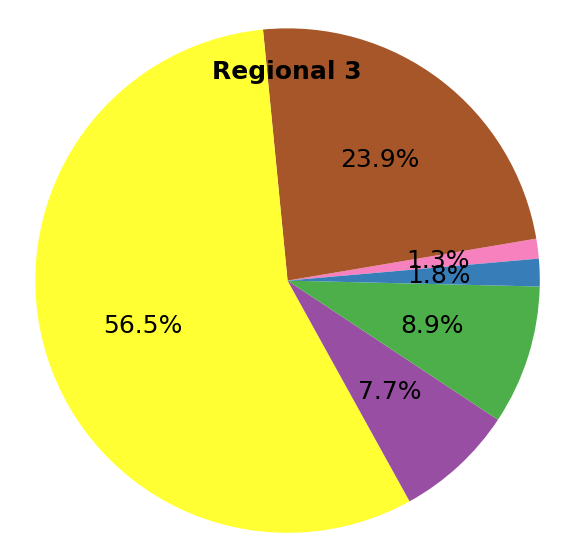

In [28]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [1.272551, 23.890955, 56.485220, 7.661487, 8.925608, 1.764179]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 3', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [29]:
df['speed_id_v2'][df['reg'] == 4].value_counts(normalize=True).sort_index()*100

10M       28.913814
20M       53.138852
30M        6.620776
40-50M     7.346107
<10M       2.166752
>=100M     1.813698
Name: speed_id_v2, dtype: float64

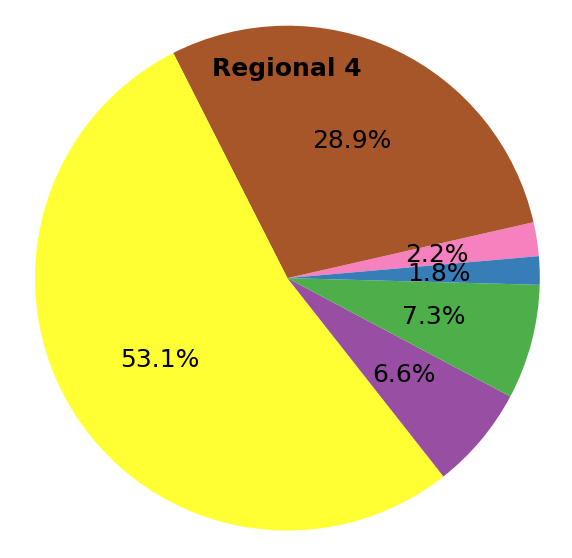

In [30]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [2.166752, 28.913814, 53.138852, 6.620776, 7.346107, 1.813698]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 4', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [31]:
df['speed_id_v2'][df['reg'] == 5].value_counts(normalize=True).sort_index()*100

10M       25.738988
20M       53.934364
30M        6.804586
40-50M     8.723757
<10M       3.142471
>=100M     1.655834
Name: speed_id_v2, dtype: float64

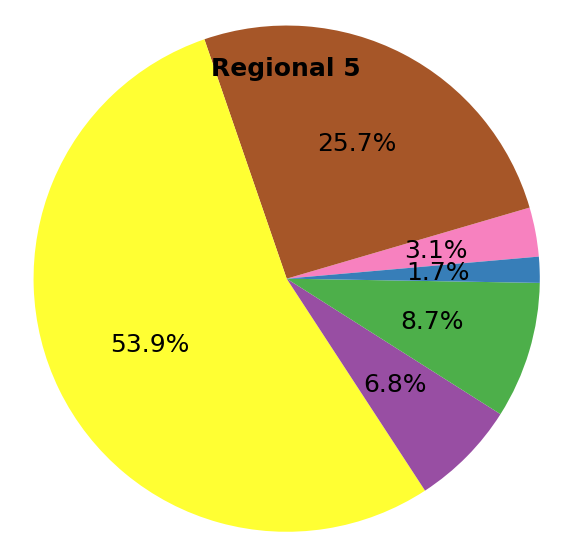

In [32]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [3.142471, 25.738988, 53.934364, 6.804586, 8.723757, 1.655834]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 5', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [33]:
df['speed_id_v2'][df['reg'] == 6].value_counts(normalize=True).sort_index()*100

10M       33.874048
20M       50.415621
30M        6.350821
40-50M     6.767514
<10M       0.989593
>=100M     1.602403
Name: speed_id_v2, dtype: float64

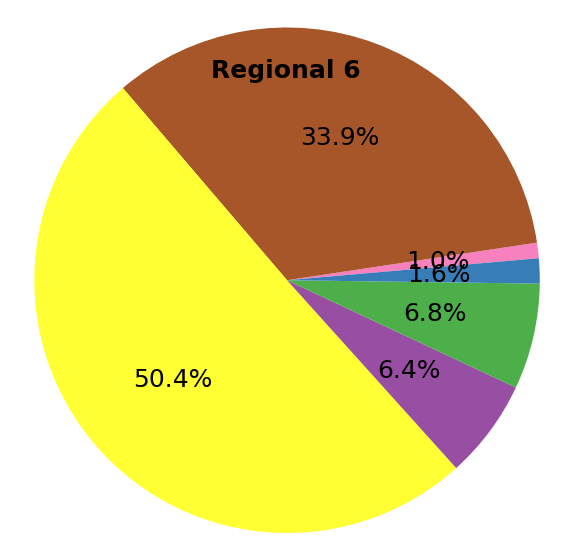

In [34]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [0.989593, 33.874048, 50.415621, 6.350821, 6.767514, 1.602403]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 6', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [35]:
df['speed_id_v2'][df['reg'] == 7].value_counts(normalize=True).sort_index()*100

10M       20.812008
20M       57.383271
30M       10.334553
40-50M     9.410757
<10M       0.645086
>=100M     1.414325
Name: speed_id_v2, dtype: float64

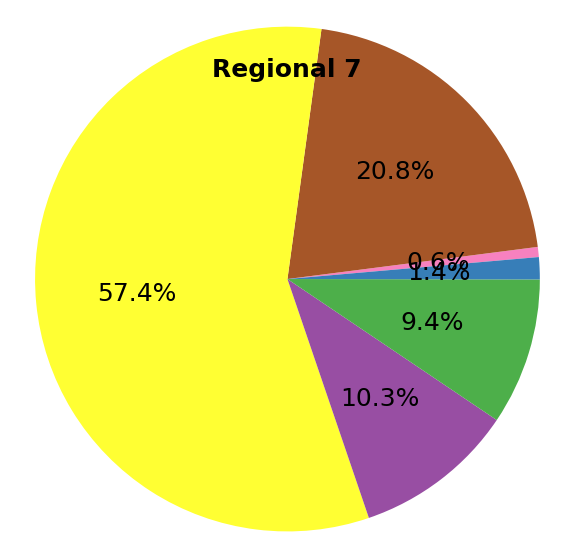

In [36]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [0.645086, 20.812008, 57.383271, 10.334553, 9.410757, 1.414325]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 7', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

# -----
## Checkpoint
# -----

In [37]:
df['speed_id_v2'][df['gangguan_v2'] == 'Lambat'].value_counts(normalize=True).sort_index()*100

10M       17.792076
20M       54.809306
30M       10.253540
40-50M    12.458620
<10M       2.073036
>=100M     2.613422
Name: speed_id_v2, dtype: float64

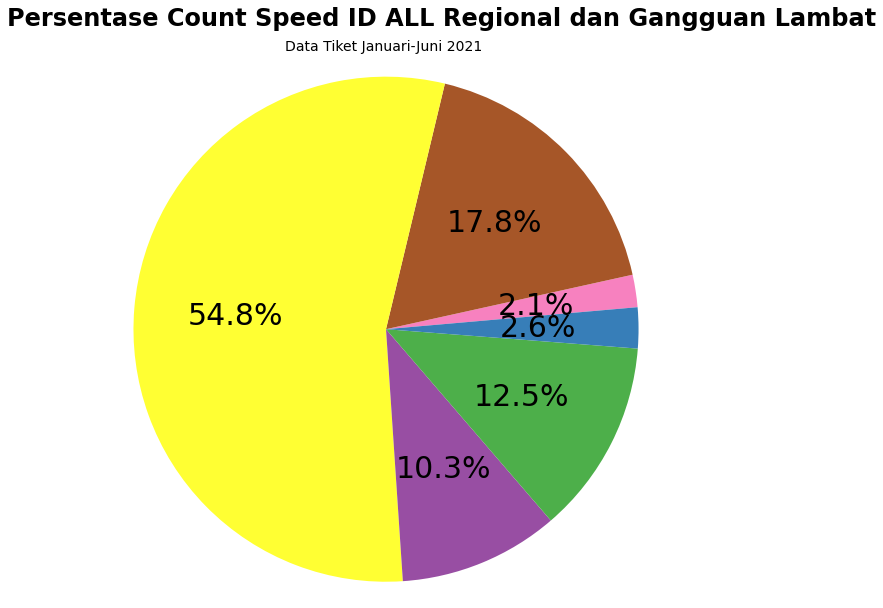

In [38]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [2.073036, 17.792076, 54.809306, 10.253540, 12.458620, 2.613422]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 30})
ax.axis('equal')

ax.text(x=-1.5, y=1.2, s='Persentase Count Speed ID ALL Regional dan Gangguan Lambat', weight='bold', size=24)
ax.text(x=-0.4, y=1.1, s='Data Tiket Januari-Juni 2021', size=14)

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [39]:
df['speed_id_v2'][(df['reg'] == 1) & (df['gangguan_v2'] == 'Lambat')].value_counts(normalize=True).sort_index()*100

10M       15.752620
20M       53.821251
30M       10.643630
40-50M    14.442100
<10M       1.613870
>=100M     3.726529
Name: speed_id_v2, dtype: float64

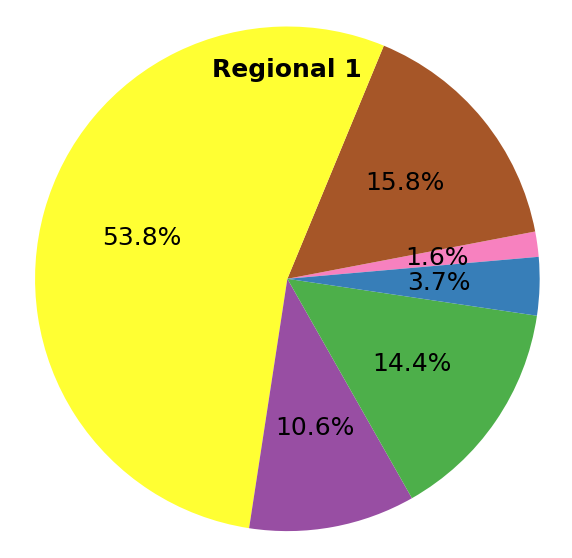

In [40]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [1.613870, 15.752620, 53.821251, 10.643630, 14.442100, 3.726529]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 1', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [41]:
df['speed_id_v2'][(df['reg'] == 2) & (df['gangguan_v2'] == 'Lambat')].value_counts(normalize=True).sort_index()*100

10M       15.717108
20M       55.758260
30M       10.828678
40-50M    12.236674
<10M       2.738739
>=100M     2.720540
Name: speed_id_v2, dtype: float64

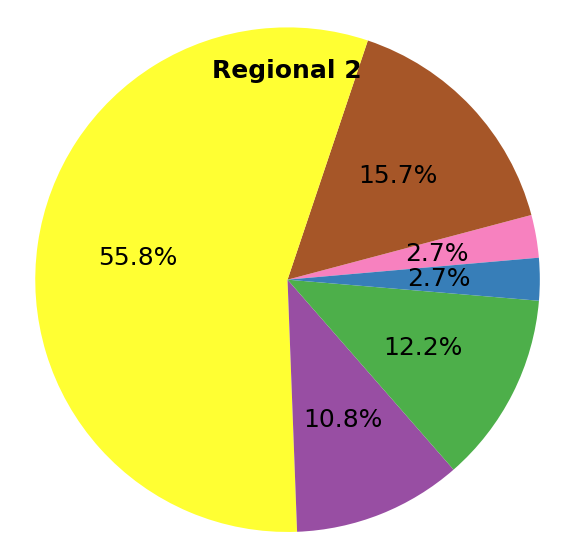

In [42]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [2.738739, 15.717108, 55.758260, 10.828678, 12.236674, 2.720540]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 2', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [43]:
df['speed_id_v2'][(df['reg'] == 3) & (df['gangguan_v2'] == 'Lambat')].value_counts(normalize=True).sort_index()*100

10M       17.097027
20M       56.289124
30M       10.092267
40-50M    12.984155
<10M       1.072640
>=100M     2.464789
Name: speed_id_v2, dtype: float64

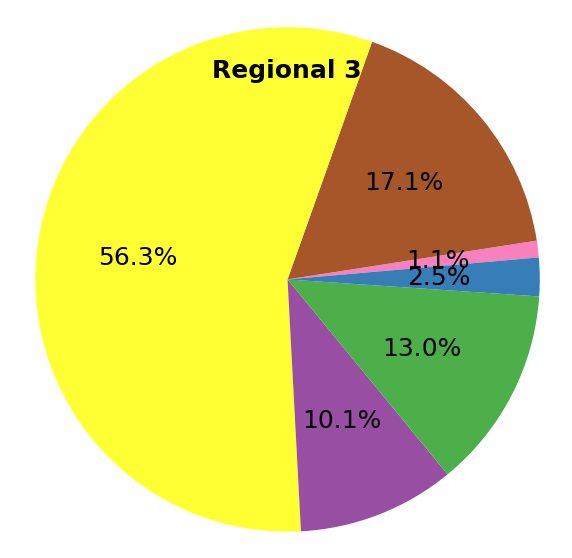

In [44]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [1.072640, 17.097027, 56.289124, 10.092267, 12.984155, 2.464789]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 3', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [45]:
df['speed_id_v2'][(df['reg'] == 4) & (df['gangguan_v2'] == 'Lambat')].value_counts(normalize=True).sort_index()*100

10M       22.489072
20M       54.501157
30M        8.953458
40-50M    10.012857
<10M       1.793520
>=100M     2.249936
Name: speed_id_v2, dtype: float64

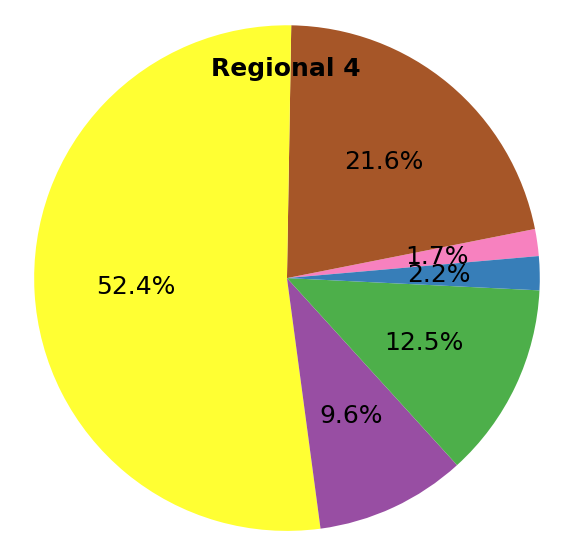

In [46]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [1.793520, 22.489072, 54.501157, 10.012857, 12.984155, 2.249936]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 4', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [47]:
df['speed_id_v2'][(df['reg'] == 5) & (df['gangguan_v2'] == 'Lambat')].value_counts(normalize=True).sort_index()*100

10M       20.189940
20M       53.805568
30M        8.632990
40-50M    12.506652
<10M       2.685859
>=100M     2.178991
Name: speed_id_v2, dtype: float64

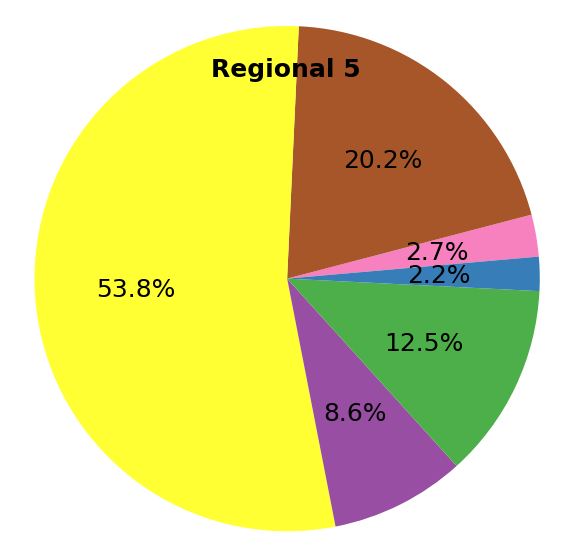

In [48]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [2.685859, 20.189940, 53.805568, 8.632990, 12.506652, 2.178991]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 5', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [49]:
df['speed_id_v2'][(df['reg'] == 6) & (df['gangguan_v2'] == 'Lambat')].value_counts(normalize=True).sort_index()*100

10M       23.682610
20M       52.207134
30M        9.576409
40-50M    11.297122
<10M       0.952574
>=100M     2.284151
Name: speed_id_v2, dtype: float64

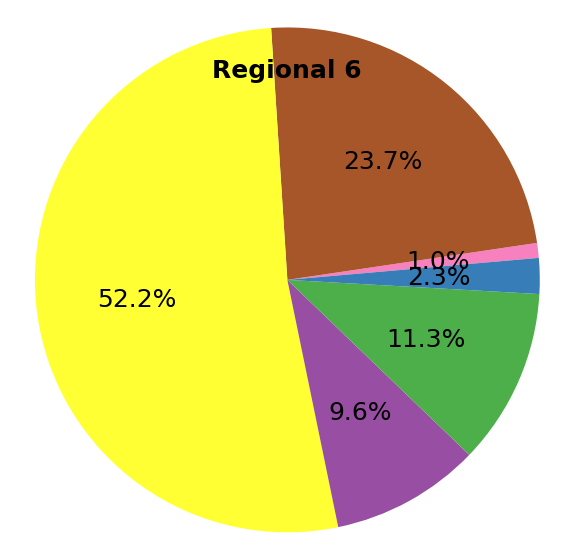

In [50]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [0.952574, 23.682610, 52.207134, 9.576409, 11.297122, 2.284151]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 6', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

In [51]:
df['speed_id_v2'][(df['reg'] == 7) & (df['gangguan_v2'] == 'Lambat')].value_counts(normalize=True).sort_index()*100

10M       14.372741
20M       54.804173
30M       13.361217
40-50M    14.829632
<10M       0.470529
>=100M     2.161708
Name: speed_id_v2, dtype: float64

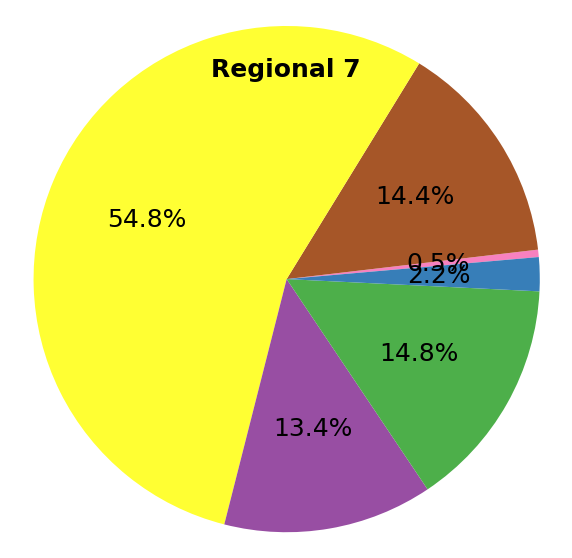

In [52]:
labels = '<10M', '10M', '20M', '30M', '40-50M', '>=100M'
sizes = [0.470529, 14.372741, 54.804173, 13.361217, 14.829632, 2.161708]

sns.set_palette('Set1_r')
fig1, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%', startangle=5, textprops={'fontsize': 25})
ax.axis('equal')

# ax.text(x=-0.65, y=1.2, s='Persentase Speed ID ALL Regional', weight='bold', size=17)
ax.text(x=-0.3, y=0.8, s='Regional 7', size=25, weight='bold')

# patches, texts, auto = ax.pie(sizes, startangle=90, autopct='%1.1f%%' )
# ax.legend(patches, labels, loc="best")

plt.show()

# -----
# Checkpoint
# -----

In [53]:
df_conc

,speed_id,marah_perc,reg
0,<10M,31.32,1
1,10M,33.14,1
2,20M,32.94,1
3,30M,30.95,1
4,40-50M,31.38,1
5,>=100M,29.66,1
6,<10M,36.81,2
7,10M,37.85,2
8,20M,38.13,2
9,30M,36.14,2


In [54]:
df_conc['ramah_perc'] = df_conc['marah_perc'].apply(lambda x:100-x)

In [55]:
df_conc

,speed_id,marah_perc,reg,ramah_perc
0,<10M,31.32,1,68.68
1,10M,33.14,1,66.86
2,20M,32.94,1,67.06
3,30M,30.95,1,69.05
4,40-50M,31.38,1,68.62
5,>=100M,29.66,1,70.34
6,<10M,36.81,2,63.19
7,10M,37.85,2,62.15
8,20M,38.13,2,61.87
9,30M,36.14,2,63.86


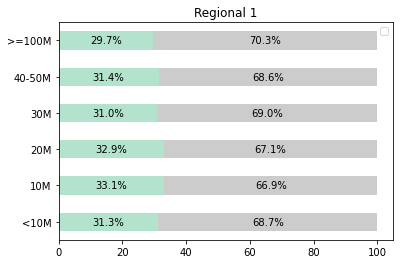

In [66]:
df1 = df_conc[df_conc['reg'] == 1]
df1 = df1.drop('reg', axis=1)

df1.plot(x ='speed_id', kind ='barh', stacked=True, title='Regional 1', mark_right=True, cmap='Pastel2')

df_total = df1["marah_perc"] + df1["ramah_perc"]
df_rel = df1[df1.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df1.iloc[:, 1:].cumsum(1)[n], 
                                         df1[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

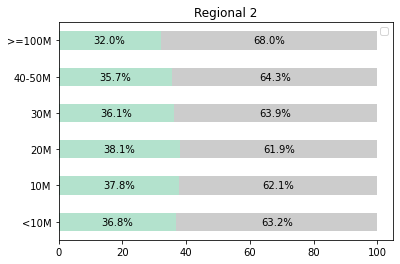

In [67]:
df2 = df_conc[df_conc['reg'] == 2]
df2 = df2.drop('reg', axis=1)

df2.plot(x ='speed_id', kind ='barh', stacked=True, title='Regional 2', mark_right=True, cmap='Pastel2')

df_total = df2["marah_perc"] + df2["ramah_perc"]
df_rel = df2[df2.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df2.iloc[:, 1:].cumsum(1)[n], 
                                         df2[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

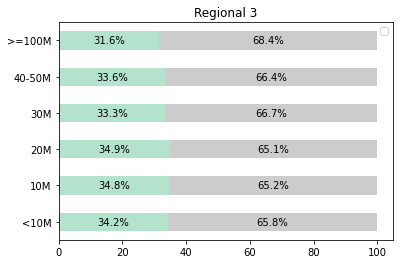

In [68]:
df3 = df_conc[df_conc['reg'] == 3]
df3 = df3.drop('reg', axis=1)

df3.plot(x ='speed_id', kind ='barh', stacked=True, title='Regional 3', mark_right=True, cmap='Pastel2')

df_total = df3["marah_perc"] + df3["ramah_perc"]
df_rel = df3[df3.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df3.iloc[:, 1:].cumsum(1)[n], 
                                         df3[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

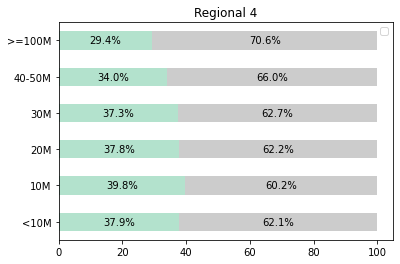

In [69]:
df4 = df_conc[df_conc['reg'] == 4]
df4 = df4.drop('reg', axis=1)

df4.plot(x ='speed_id', kind ='barh', stacked=True, title='Regional 4', mark_right=True, cmap='Pastel2')

df_total = df4["marah_perc"] + df4["ramah_perc"]
df_rel = df4[df4.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df4.iloc[:, 1:].cumsum(1)[n], 
                                         df4[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

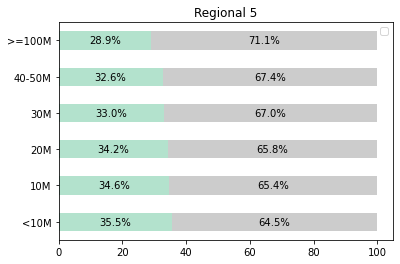

In [70]:
df5 = df_conc[df_conc['reg'] == 5]
df5 = df5.drop('reg', axis=1)

df5.plot(x ='speed_id', kind ='barh', stacked=True, title='Regional 5', mark_right=True, cmap='Pastel2')

df_total = df5["marah_perc"] + df5["ramah_perc"]
df_rel = df5[df5.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df5.iloc[:, 1:].cumsum(1)[n], 
                                         df5[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

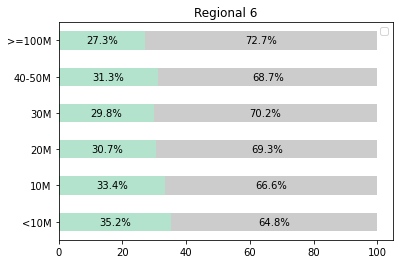

In [71]:
df6 = df_conc[df_conc['reg'] == 6]
df6 = df6.drop('reg', axis=1)

df6.plot(x ='speed_id', kind ='barh', stacked=True, title='Regional 6', mark_right=True, cmap='Pastel2')

df_total = df6["marah_perc"] + df6["ramah_perc"]
df_rel = df6[df6.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df6.iloc[:, 1:].cumsum(1)[n], 
                                         df6[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

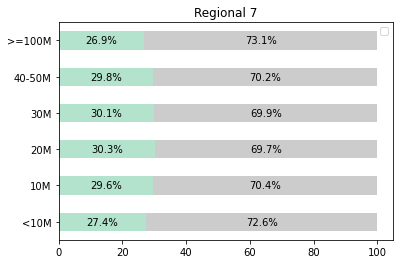

In [72]:
df7 = df_conc[df_conc['reg'] == 7]
df7 = df7.drop('reg', axis=1)

df7.plot(x ='speed_id', kind ='barh', stacked=True, title='Regional 7', mark_right=True, cmap='Pastel2')

df_total = df7["marah_perc"] + df7["ramah_perc"]
df_rel = df7[df7.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df7.iloc[:, 1:].cumsum(1)[n], 
                                         df7[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

In [63]:
plot_all['ramah_perc'] = plot_all['marah_perc'].apply(lambda x:100-x)

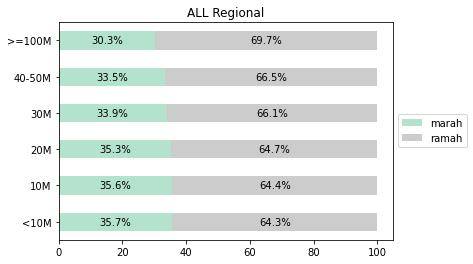

In [73]:
plot_all.plot(x ='speed_id', kind ='barh', stacked=True, title='ALL Regional', mark_right=True, cmap='Pastel2')

df_total = plot_all["marah_perc"] + plot_all["ramah_perc"]
df_rel = plot_all[plot_all.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(plot_all.iloc[:, 1:].cumsum(1)[n], 
                                         plot_all[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend(['marah', 'ramah'], bbox_to_anchor=(1, 0.6))
plt.ylabel('')


plt.show();